# Convolutional Neural Networks

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

# 1. Load CIFAR-10 Database

In [2]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [18]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16995830228328014585
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1123441880107581334
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# 2. Visualize the First 24 Training Images

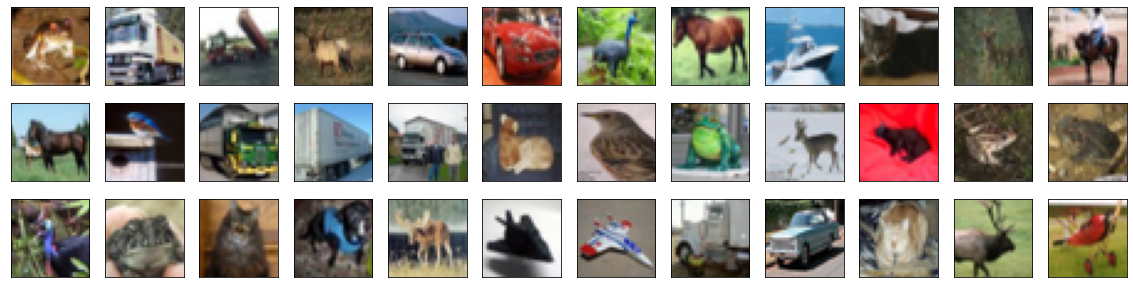

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

# 3. Rescale the Images by Dividing Every Pixel in Every Image by 255


In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# 4. Break Dataset into Training, Testing, and Validation Sets


In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


# 5. Define the Model Architecture


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

# 6. Compile the Model


In [23]:
# compile the model
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# 7. Train the Model

In [24]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='modelADAM.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.84821, saving model to modelADAM.weights.best.hdf5
1407/1407 - 7s - loss: 1.0032 - accuracy: 0.6582 - val_loss: 0.8482 - val_accuracy: 0.7178 - 7s/epoch - 5ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.84821
1407/1407 - 6s - loss: 0.9305 - accuracy: 0.6849 - val_loss: 0.8713 - val_accuracy: 0.7114 - 6s/epoch - 4ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.84821
1407/1407 - 6s - loss: 0.8883 - accuracy: 0.6966 - val_loss: 0.8544 - val_accuracy: 0.7118 - 6s/epoch - 4ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.84821
1407/1407 - 6s - loss: 0.8621 - accuracy: 0.7039 - val_loss: 0.8568 - val_accuracy: 0.7184 - 6s/epoch - 4ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.84821 to 0.81284, saving model to modelADAM.weights.best.hdf5
1407/1407 - 6s - loss: 0.8323 - accuracy: 0.7151 - val_loss: 0.8128 - val_accuracy: 0.7302 - 6s/epoch - 4ms/step
Epoch 6/50

Epoch 6: val_loss improved from 0.

# 8. Load the Model with the Best Validation Accuracy


In [30]:
# load the weights that yielded the best validation accuracy
model.load_weights('modelADAM.weights.best.hdf5')

# https://www.tensorflow.org/tutorials/quickstart/advanced TRY THIS WEBSITE TO USE ADVANCED TF/KERAS

# Evaluate the model

313/313 - 1s - loss: 0.7465 - accuracy: 0.7505 - 896ms/epoch - 3ms/step


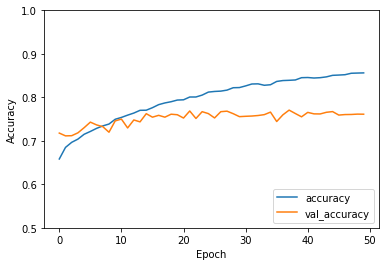

In [26]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

# 9. Calculate Classification Accuracy on Test Set


In [27]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7505000233650208


# 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.



In [28]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

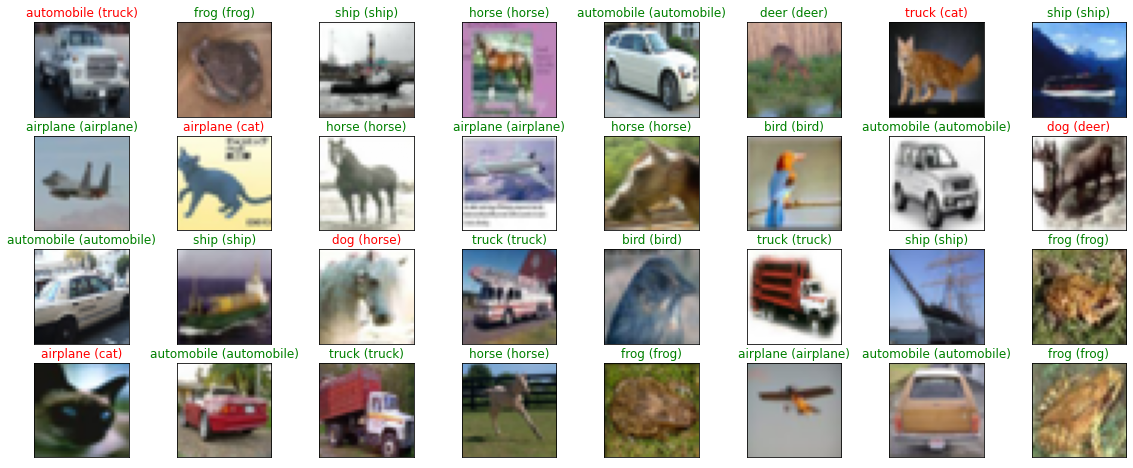

In [29]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))